In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y):
    # Agregar una columna de unos para el término independiente
    
    Xv = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa
    coeficientes = np.linalg.inv(np.transpose(Xv)@Xv)@np.transpose(Xv)@y

    return coeficientes  

# Función para predecir los valores de y
def predecir(X, coeficientes):
    Xm = np.column_stack((np.ones(X.shape[0]), X))
    return  Xm@coeficientes #multiplicacion de matrices

# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error= y_true - y_pred
    return np.sqrt(np.mean((error) ** 2))

def r2F(y_true, y_pred):
   # https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n
   
    numerador = ((y_true-y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, r2_, rmse_val


opcion=int(input())
# Cargar los datos
data = pd.read_csv('Mediciones.csv')
data.dropna(inplace=True) #hay una ultima fila de NaN

# Definir las columnas de características (X) y la columna de objetivo (y)
if opcion==1:
    #imprimir numero de filas y numero de columnas
    print(data.shape)
    
    #seleccionar las caracteristicas(variables dependientes) [no es independiente??] y el objetivo
    caracteristicas = data.columns[[0,1,5,6]].tolist() #son las columnas que me interesan (mi X)
    objetivo =data.columns[[7]].tolist()
    
    print(caracteristicas)
    print(objetivo)
elif opcion==2: 
    # modelo completo solo con VTI_F, completar la funcion regresion manual
    
    X = data['VTI_F']
    y = data['Pasos']
    coef=regresion_manual(X, y)
    print(coef)
elif opcion==3: 
    # modelo completo solo con VTI_F, completar las funciones que definen las métricas
    X = data['VTI_F']
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print( coef)
    y_pred = predecir(X,coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    # imprimir los primeros 2 elementos de y e y_pred
    print(y[:2],  y_pred [:2])
    # imprimir r2 y rmse
    print(r2_,  rmse_val )
elif opcion==4: 
    # modelo completo solo con VTI_F, completar la función ajustar_evaluar_modelo
    X_todo =data['VTI_F']  #data[completar]
    y =data['Pasos'] # data[completar]
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print(r2_todo, rmse_todo)
elif opcion==5:
   # Completar la combinaciones de características de los modelos solicitados 
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F', 'PEEP'],
        'Modelo_4': ['VTI_F','PEEP','BPM'],
        'Modelo_5': ['VTI_F','PEEP','BPM','VTE_F']
      #COMPLETAR EL DICCIONARIO
    }
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        print(nombre_modelo,r2, rmse_val)
elif opcion==6:
    # Modelos para cada combinación de PEEP y BPM
    valores_peep_unicos = data['PEEP'].unique() #completar sugerencia, utilizar unique()
    valores_bpm_unicos = data['BPM'].unique() #completar
    print(valores_peep_unicos)
    print(valores_bpm_unicos)
    predicciones_totales = []
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            condicion1=data['PEEP']==peep
            condicion2=data['BPM']==bpm
            datos_subset = data.loc[condicion1 & condicion2, ['VTI_F', 'Pasos']]
            
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print(peep, bpm, r2_subset, rmse_subset)
            predicciones_totales.append(y_pred_subset)
    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y=data['Pasos']
    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', r2_global, rmse_global)

    #Marcos Lorenzo Vera Bower 4991625

[ 0. 10.]
[12. 20.]
0.0 12.0 0.9975786045111337 224.3313245927677
0.0 20.0 0.9970035350957476 249.55234426446927
10.0 12.0 0.9981629787974335 195.39531240805024
10.0 20.0 0.9984773587292524 177.89176935322902
Global 0.9978056192833917 213.55662330872573


# el modelo con menor error es el que usa los valores de PEEP=10 y BPM=20
# porque tiene el coeficiente de determinacion mas alto y el error medio cuadratico mas bajo

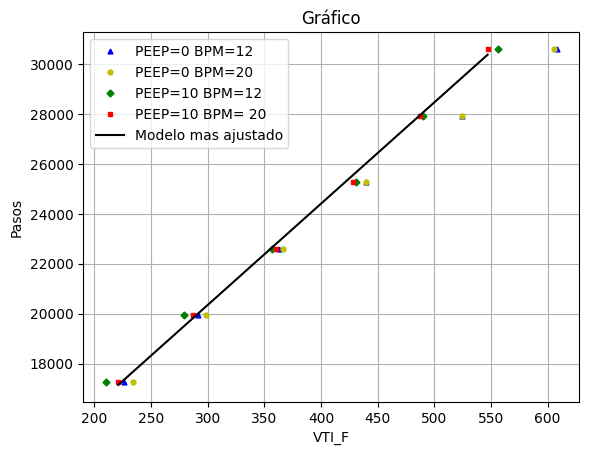

In [9]:
#entonces superponemos el grafico de esa recta
xmod1 = data.iloc[0:6]['VTI_F']
ymod1=data.iloc[0:6]['Pasos']
xmod2 = data.iloc[6:12]['VTI_F']
ymod2=data.iloc[6:12]['Pasos']
xmod3 = data.iloc[12:18]['VTI_F']
ymod3=data.iloc[12:18]['Pasos']
xmod4 = data.iloc[18:24]['VTI_F']
ymod4=data.iloc[18:24]['Pasos']
ymodfinal=predicciones_totales[3]
plt.plot(xmod1, ymod1, '^', markersize=3.5, color='b',label='PEEP=0 BPM=12')
plt.plot(xmod2, ymod2, 'o', markersize=3.5, color='y',label='PEEP=0 BPM=20')
plt.plot(xmod3, ymod3, 'D', markersize=3.5, color='g',label='PEEP=10 BPM=12')
plt.plot(xmod4, ymod4, 's', markersize=3.5, color='r',label='PEEP=10 BPM= 20')
plt.plot(xmod4,ymodfinal,color='k',label='Modelo mas ajustado')
# Personalizar el gráfico
plt.xlabel('VTI_F')
plt.ylabel('Pasos')
plt.title('Gráfico')
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()